In [2]:
# collisionData plot
import numpy as np

# Load Data

In [3]:
# load data
Data = np.load('logs/CollisionData.npy')
Data.shape

(2985984, 17)

Data = np.hstack((config, y.reshape(-1,1),EEPosition,EEOrientation,EEQuaternion))

In [4]:
config, y, EEPosition, EEOrientation, EEQuaternion = Data[:,:6], Data[:,6], Data[:,7:10], Data[:,10:13], Data[:,13:17]

# Plot Points

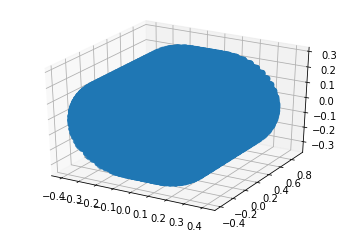

In [4]:
# plot all points
%matplotlib inline
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition[:,1], EEPosition[:,2], -EEPosition[:,0])
plt.show()

In [9]:
# plot points in C-free
EEPosition_free = EEPosition[y==0,:]
print(EEPosition_free)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(-EEPosition_free[:,1], EEPosition_free[:,2], -EEPosition_free[:,0])
#plt.show()

[[ 4.76837158e-07  4.99997735e-02 -1.78813934e-07]
 [ 4.76837158e-07  4.99997735e-02 -1.78813934e-07]
 [ 4.77637053e-02  2.45038390e-01 -1.07305348e-01]
 ...
 [-6.74492121e-02  4.10436392e-02 -1.20801926e-01]
 [-7.45282173e-02  6.83174133e-02 -1.29863739e-01]
 [-7.99129009e-02  9.41517353e-02 -1.43268466e-01]]


# Save C-free Points

In [7]:
# C-free point orientation
EEOrientation_free = EEOrientation[y==0,:]
print(EEOrientation_free)

# C-free point quaternion
EEQuaternion_free = EEQuaternion[y==0,:]
print(EEQuaternion_free)

[[-8.94069672e-08 -2.66453526e-15  5.96046448e-08]
 [-8.94069672e-08 -2.66453526e-15  5.96046448e-08]
 [ 2.18684366e-03  5.83610907e-02 -1.64564991e+00]
 ...
 [-2.88017571e-01 -3.47473502e-01  1.80905640e+00]
 [-4.60869133e-01 -3.81539345e-01  1.74729407e+00]
 [-6.37740135e-01 -4.05044675e-01  1.67935598e+00]]
[[-4.47034836e-08  0.00000000e+00  2.98023224e-08  1.00000000e+00]
 [-4.47034836e-08  0.00000000e+00  2.98023224e-08  1.00000000e+00]
 [-2.06449591e-02  2.06456222e-02 -7.32735932e-01  6.79886520e-01]
 ...
 [-2.21850514e-01  5.38703753e-03  7.81616628e-01  5.82948267e-01]
 [-2.85511166e-01  5.34111559e-02  7.60674596e-01  5.80521226e-01]
 [-3.47229332e-01  1.01071939e-01  7.34557211e-01  5.74144602e-01]]


# Insertion

In [10]:
# insertion of C-free points
from transforms3d import quaternions
total_config = EEPosition_free.shape[0]

new_config = 15  # !!! setup insertion linspace numbers here
EEPosition_new  = np.zeros((total_config*new_config, 3))
EEOrientation_new  = np.zeros((total_config*new_config, 3))
EEQuaternion_new  = np.zeros((total_config*new_config, 4))

count = 0
for i in range(total_config):
    quat = EEQuaternion_free[i,:]
    orient = EEOrientation_free[i,:]
    pos = np.matrix(EEPosition[i,:]).T
    #quat = quaternions.qinverse(quat)
    # inverse transformation matrix
    M = quaternions.quat2mat(quat)
    M = M.T
    
    offset = np.linspace(0,0.15,new_config)
    
    for j in range(new_config):
        insertion = np.array([[0],[0],[offset[j]]])
        
        # inverse transformation matrix
        insertion = -np.matmul(M,insertion)
        
        homo = np.array([0,0,0,1])
        T = np.hstack((M, insertion))
        T = np.vstack((T,homo))
        #print(insertion)
        #print(T)

        h_pos_new = T*np.vstack((pos,1))
        #print(h_pos_new)
        pos_new = np.asarray(h_pos_new[:3]).reshape(-1)
        EEPosition_new[count,:] = pos_new
        EEOrientation_new[count,:] = orient
        EEQuaternion_new[count,:] = quat
        count += 1
    #print(pos_new)
print(EEPosition_new)

[[-4.81307486e-07 -4.99997735e-02 -1.75833716e-07]
 [-4.81307486e-07 -4.99997741e-02 -1.07144615e-02]
 [-4.81307486e-07 -4.99997748e-02 -2.14287473e-02]
 ...
 [ 3.04329047e-01  3.58658575e-01 -3.14278433e-02]
 [ 2.97619982e-01  3.50373285e-01 -3.03609191e-02]
 [ 2.90910917e-01  3.42087994e-01 -2.92939949e-02]]


### Plot Points After Insertion

In [ ]:
# plot new points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new[:,1], EEPosition_new[:,2], -EEPosition_new[:,0])
plt.show()

### Save Inserted Points

In [ ]:
print('all points shape: ',EEPosition.shape)
print('free points shape: ',EEPosition_free.shape)
print('new points shape: ',EEPosition_new.shape)

# save data
np.save('logs/EEPosition_new.npy',EEPosition_new)
np.save('logs/EEOrientation_new.npy',EEOrientation_new)
np.save('logs/EEQuaternion_new.npy',EEQuaternion_new)

# below here is a 2D demo (not very interested)

In [64]:
# set surface size
xmin = ymin = -0.2
xmax = ymax = 0.2

In [65]:
inplane_x = np.logical_and((-EEPosition_new[:,1]>xmin), (-EEPosition_new[:,1]<xmax))
inplane_y = np.logical_and((EEPosition_new[:,2]>ymin), (EEPosition_new[:,2]<ymax))
inplane_z = np.logical_and((-EEPosition_new[:,0]>-0.4), (-EEPosition_new[:,0]<-0.25))   # thick of Z-slice

In [66]:
# get points in plane
inplane_xy = np.logical_and(inplane_x, inplane_y)
inplane_xyz = np.logical_and(inplane_xy, inplane_z)
print(inplane_xyz)

EEPosition_new_inplane = EEPosition_new[inplane_xyz]
EEOrientation_new_inplane = EEOrientation_new[inplane_xyz]
EEQuaternion_new_inplane = EEQuaternion_new[inplane_xyz]

[False False False ... False False False]


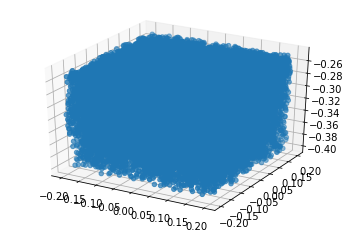

In [67]:
# plot inplane points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new_inplane[:,1], EEPosition_new_inplane[:,2], -EEPosition_new_inplane[:,0])
plt.show()

In [68]:
print(EEQuaternion_new_inplane.shape)
print(EEPosition_new_inplane.shape)

(41188, 4)
(41188, 3)


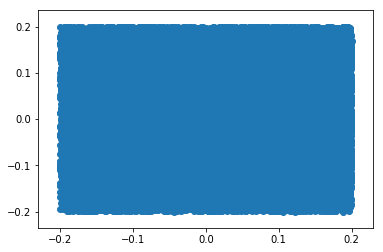

In [69]:
# plot plane
x_inplane = -EEPosition_new_inplane[:,1]
y_inplane = EEPosition_new_inplane[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_inplane, y_inplane)
plt.show()

In [70]:
data = np.array([x_inplane,y_inplane])

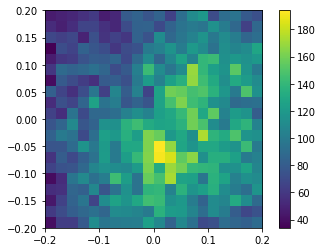

In [71]:
#hisat = np.histogramdd(data.T,bins=[5,5],density=True)
%matplotlib inline
hist, xedges, yedges = np.histogram2d(x_inplane, y_inplane, bins=20)
plt.imshow(hist, extent=(np.amin(x_inplane), np.amax(x_inplane), np.amin(y_inplane), np.amax(y_inplane)))
plt.colorbar()
plt.show()

In [72]:
# 3D histogram doesn't work
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
# xpos = xpos.flatten('F')
# ypos = ypos.flatten('F')
# zpos = np.zeros_like(xpos)

# # Construct arrays with the dimensions for the 16 bars.
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = hist.flatten()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

In [73]:
# discretelize
plane_res = 0.01
xis = np.ceil((x_inplane - xmin) / plane_res).astype(np.int16)-1
yis = np.ceil((y_inplane - ymin) / plane_res).astype(np.int16)-1
print(xis)
print(yis)

[38 38 38 ... 31 31 32]
[11 12 13 ... 29 28 28]


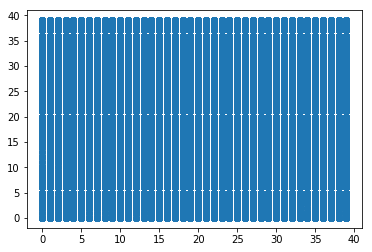

In [74]:
# plot discrete
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xis, yis,cmap="hot")
plt.show()

In [75]:
# map orientation inforation to each grid
hash_orientation = dict()
count = 0
for i in zip(xis,yis):
    if i in hash_orientation:
        value = hash_orientation[i]
        hash_orientation[i] = np.vstack((value,EEOrientation_new_inplane[count,:]))
    else:
        hash_orientation[i] = EEOrientation_new_inplane[count,:]
    count += 1
print(hash_orientation)

{(38, 11): array([[-1.75532603, -0.49269611, -2.32834673],
       [ 0.30680004, -0.40892804, -0.60754073],
       [ 0.42541406, -0.39783609, -0.82870418],
       [ 0.64342767,  0.60157716, -0.53335488],
       [ 0.63215935,  0.58722335, -0.61998874],
       [ 0.63215935,  0.58722335, -0.61998874],
       [-0.38139674, -0.71000856, -0.36728284],
       [ 0.53458655, -0.26488957,  0.51496392],
       [ 0.53458655, -0.26488957,  0.51496392],
       [ 0.56224728, -0.36624745, -1.20659089],
       [ 1.50492156,  1.12524629, -2.18862772],
       [ 0.30632746,  0.73316592, -0.28211468],
       [-0.53963208,  0.94676673,  0.4848094 ],
       [ 0.98586279,  0.55987346, -0.81768006],
       [ 0.98586279,  0.55987346, -0.81768006],
       [ 1.12648296, -0.09491874, -0.87140262],
       [ 0.55183887, -0.22305079, -1.27623105],
       [ 0.50499994, -0.15366161,  1.09095693],
       [ 0.35674551,  0.36681172,  1.05669594],
       [ 0.18879482,  0.65443134, -1.84827626]]), (38, 12): array([[-1.755326

In [76]:
# hash map to store orientation configs
hash_plot = dict()
hash_plot.fromkeys(hash_orientation.keys())

{(38, 11): None,
 (38, 12): None,
 (38, 13): None,
 (37, 13): None,
 (37, 14): None,
 (37, 15): None,
 (11, 3): None,
 (10, 4): None,
 (10, 5): None,
 (16, 7): None,
 (16, 8): None,
 (15, 8): None,
 (3, 23): None,
 (2, 24): None,
 (1, 24): None,
 (0, 25): None,
 (29, 22): None,
 (29, 23): None,
 (28, 23): None,
 (28, 24): None,
 (27, 24): None,
 (27, 25): None,
 (26, 25): None,
 (26, 26): None,
 (25, 26): None,
 (25, 27): None,
 (11, 20): None,
 (27, 11): None,
 (27, 10): None,
 (26, 10): None,
 (26, 9): None,
 (25, 8): None,
 (25, 7): None,
 (12, 9): None,
 (11, 9): None,
 (10, 8): None,
 (9, 8): None,
 (9, 7): None,
 (8, 7): None,
 (7, 6): None,
 (6, 6): None,
 (6, 5): None,
 (5, 5): None,
 (20, 31): None,
 (19, 31): None,
 (18, 31): None,
 (17, 30): None,
 (16, 30): None,
 (15, 30): None,
 (14, 30): None,
 (26, 24): None,
 (25, 24): None,
 (24, 24): None,
 (23, 24): None,
 (22, 23): None,
 (21, 23): None,
 (20, 23): None,
 (19, 23): None,
 (18, 23): None,
 (17, 23): None,
 (16, 22):